<a href="https://colab.research.google.com/github/EOKELLO/IP-WEEK1-CORE/blob/master/Moringa_Data_Science_Core_W9_Independent_Project_2019_07_Elizabeth_Okello_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import important Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from fancyimpute import KNN
from sklearn.preprocessing import Imputer 



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [2]:
??fancyimpute

Object `fancyimpute` not found.


# **Loading the data**

In [0]:
df = pd.read_csv('train_titanic.csv')

In [4]:
#we check our data
#lets check the size
df.shape

(891, 12)

In [5]:
#we check the top rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the descriptive statistics we can see that a majority of the passengers were between the ages 14 and 43.

In a number of the features there was a presence of variances

# **Exploratory Data Analysis**

Text(0.5, 0, 'survived')

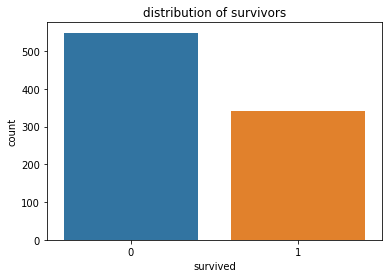

In [7]:
#lets see the distribution of survivors
sns.countplot(x='Survived', data = df)
plt.title('distribution of survivors')
plt.ylabel('count')
plt.xlabel('survived')

From the above plot we can see that the dataset is not balanced and indicates mre deaths than survivors

Text(0.5, 0, 'Sex')

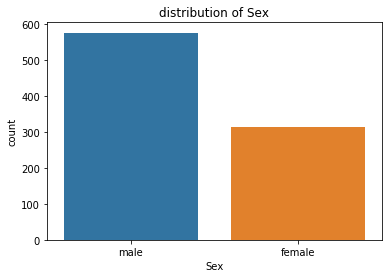

In [8]:
#lets look at the distribution of the sex
sns.countplot(x='Sex', data = df)
plt.title('distribution of Sex')
plt.ylabel('count')
plt.xlabel('Sex')


We can see that from the datasets there were more males than females. over 40% of men more than the females

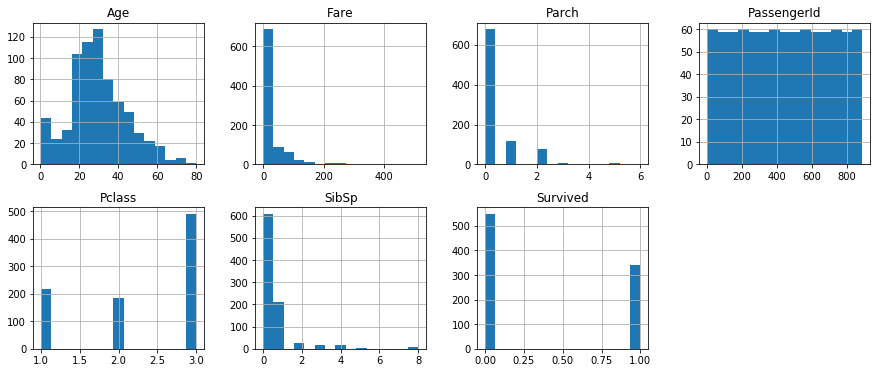

In [9]:
#lets view the distribution
numerical = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']
df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

From the above plots we see a high variance in the economic statuses of the passengers represented by the pclass.

we also see a high variance in the fares paid by the different passengers. A majority of the passengers preffered cheaper fares of not more than 100.

most of the passengers were aged between 14 and 43

there were more deaths than survivors represented by survived 1 representing those who survived and 0 representing non survivors.

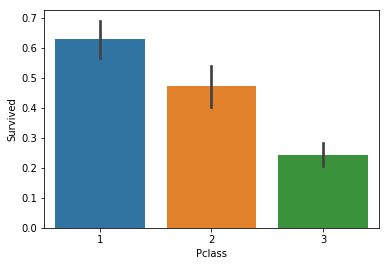

In [10]:
#lets view how the pclass compared with the age
sns.barplot(x='Pclass',y='Survived',data = df)

most of those who survived were of upper class with regard to socio economic status

In [0]:
#we want to see how the ages related to the survivor so we put the ages into categories
#sns.barplot(x='Age', y='Survived', data=df)
for i in df['Age']:
  if i is <=18

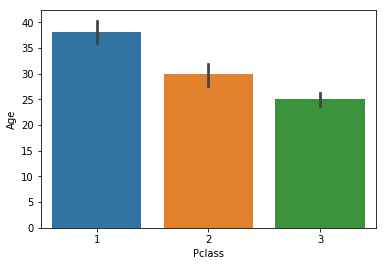

In [11]:
sns.barplot(x='Pclass',y='Age',data = df)

most of those in upper class are also elderly compared to those in lower class.

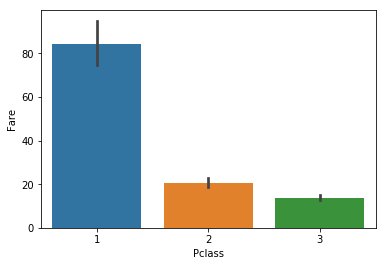

In [12]:
sns.barplot(x='Pclass',y='Fare',data = df)

Those in upper class also paid more fare.

In [0]:
#it would be interesting to find out whether more aged people died compared to young ones

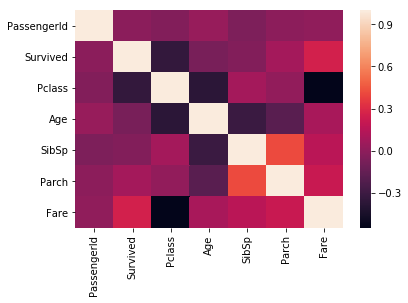

In [13]:
 
heat_map = sns.heatmap(df.corr())
plt.show()

# **DATA CLEANING**

We now want to clean our data and ensure its valid,complete,uniform, consistent and accurate.

**Valid**

In [14]:
#here we remove outliers,drop irrelevant attributes and syntax errors if any
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df2 = df[~((df < (Q1-1.5*IQR))|(df > (Q3+1.5*IQR))).any(axis=1)]
df2.shape

(598, 12)

In [0]:
#there are columns that we dont need so we shall drop them. they include name,passengerid,ticket, Fare 
df2 = df2.drop(['PassengerId', 'Name', 'Ticket', 'Fare','Cabin'],axis=1)


**Complete**

In [21]:
#check for comppleteness of the data by checking the missing values
df2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         149
SibSp         0
Parch         0
Embarked      0
dtype: int64

In [26]:
df2['Sex'].unique()

array(['male', 'female'], dtype=object)

our dataset is uniform as all the columns and their values have the same names that refer to the same columns and values.
